In [115]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
# Use geopandas for vector data and rasterio for raster data
import geopandas as gpd
import rasterio as rio
# Plotting extent is used to plot raster & vector data together
from rasterio.plot import plotting_extent

import earthpy as et
import earthpy.plot as ep

import numpy as np

import math

import random

# Prettier plotting wit h seaborn
sns.set(font_scale=1.5, style="white")

In [116]:
data_names = ["ProximityToSubway", "ProximityToHighway", "ProximityToRailway", "ProximityToPrimaryRoads", "PersonsPerPixel", "Dem", "Landuse2008", "Landuse2018"]

In [117]:
all_data = dict()
for name in data_names:
    if name == "":
        all_data[name] = np.array([[]])
        continue
    tmp = rio.open(f"commondata/raster_data/{name}.tif").read()
    tmp[tmp < 0] = np.max(tmp) * 1.5
    all_data[name] = tmp[0]


In [ ]:
n_graph, m_graph = 3, 3
im, ax = plt.subplots(n_graph, m_graph, figsize=(40, 40))

i = 0
for name, data in all_data.items():
    ax[i // m_graph][i % m_graph].set_title(name)
    ax[i // m_graph][i % m_graph].imshow(data)
    i += 1


In [118]:
n, m = all_data["ProximityToSubway"].shape

constant_factor_names = ["ProximityToSubway", "ProximityToHighway", "ProximityToRailway", "ProximityToPrimaryRoads", "PersonsPerPixel", "Dem"]
constant_factors = np.zeros((len(constant_factor_names), n, m))
for i in range(len(constant_factor_names)):
    constant_factors[i] = all_data[constant_factor_names[i]]

In [153]:
M = 2 # odd
TIP = 0
weights = np.array(range(len(constant_factors)))/1000

def P_Omega(array, x, y):
    half_m = M // 2
    lx, rx = -half_m, min(n - x, half_m + 1)
    ly, ry = -half_m, min(m - y, half_m + 1)
    return np.sum(array[x+lx:x+rx,y+ly:y+ry] - array[x, y]) / (m * m - 1)

def P_driver(x, y, parameters, weight):
    return 1/4
    tmp = math.exp(np.sum(parameters[:, x, y] * weight))
    return 1 - 1 / tmp

def P_total(array, x, y, t = 0):
    p_om = P_Omega(array, x, y)
    p_driv = P_driver(x, y,
                      constant_factors,
                      weights)
    return (p_om + p_driv * (1 + TIP) ** (t - 1)) / 2

In [157]:
def prob(p):
    global cnt, cnt_true
    cnt += 1
    maxn = 10 ** 8
    r = random.randint(0, maxn)
    res = r < maxn * p
    if res:
        cnt_true += 1
    return res

def next_step(array):
    urban = np.copy(array)
    urban[urban != 1] = 0
    res = np.copy(array)
    for i in range(n):
        if i % 1000 == 0:
            print(i)
        for j in range(m):
            if res[i, j] == 0 and prob(0.25): #prob(P_total(urban, i, j)):
                res[i, j] = 1
    return res

0
1000
2000
3000
4000
5000
0
1000
2000
3000
4000
5000
0
1000
2000
3000
4000
5000
0
1000
2000
3000
4000
5000
0
1000
2000
3000
4000
5000
0
1000
2000
3000
4000
5000
0
1000
2000
3000
4000
5000
0
1000
2000
3000
4000
5000
0
1000
2000
3000
4000
5000
0
1000
2000
3000
4000
5000
0
1000
2000
3000
4000
5000
0
1000
2000
3000
4000
5000
0
1000
2000
3000
4000
5000
0
1000
2000
3000
4000
5000
0
1000
2000
3000
4000
5000


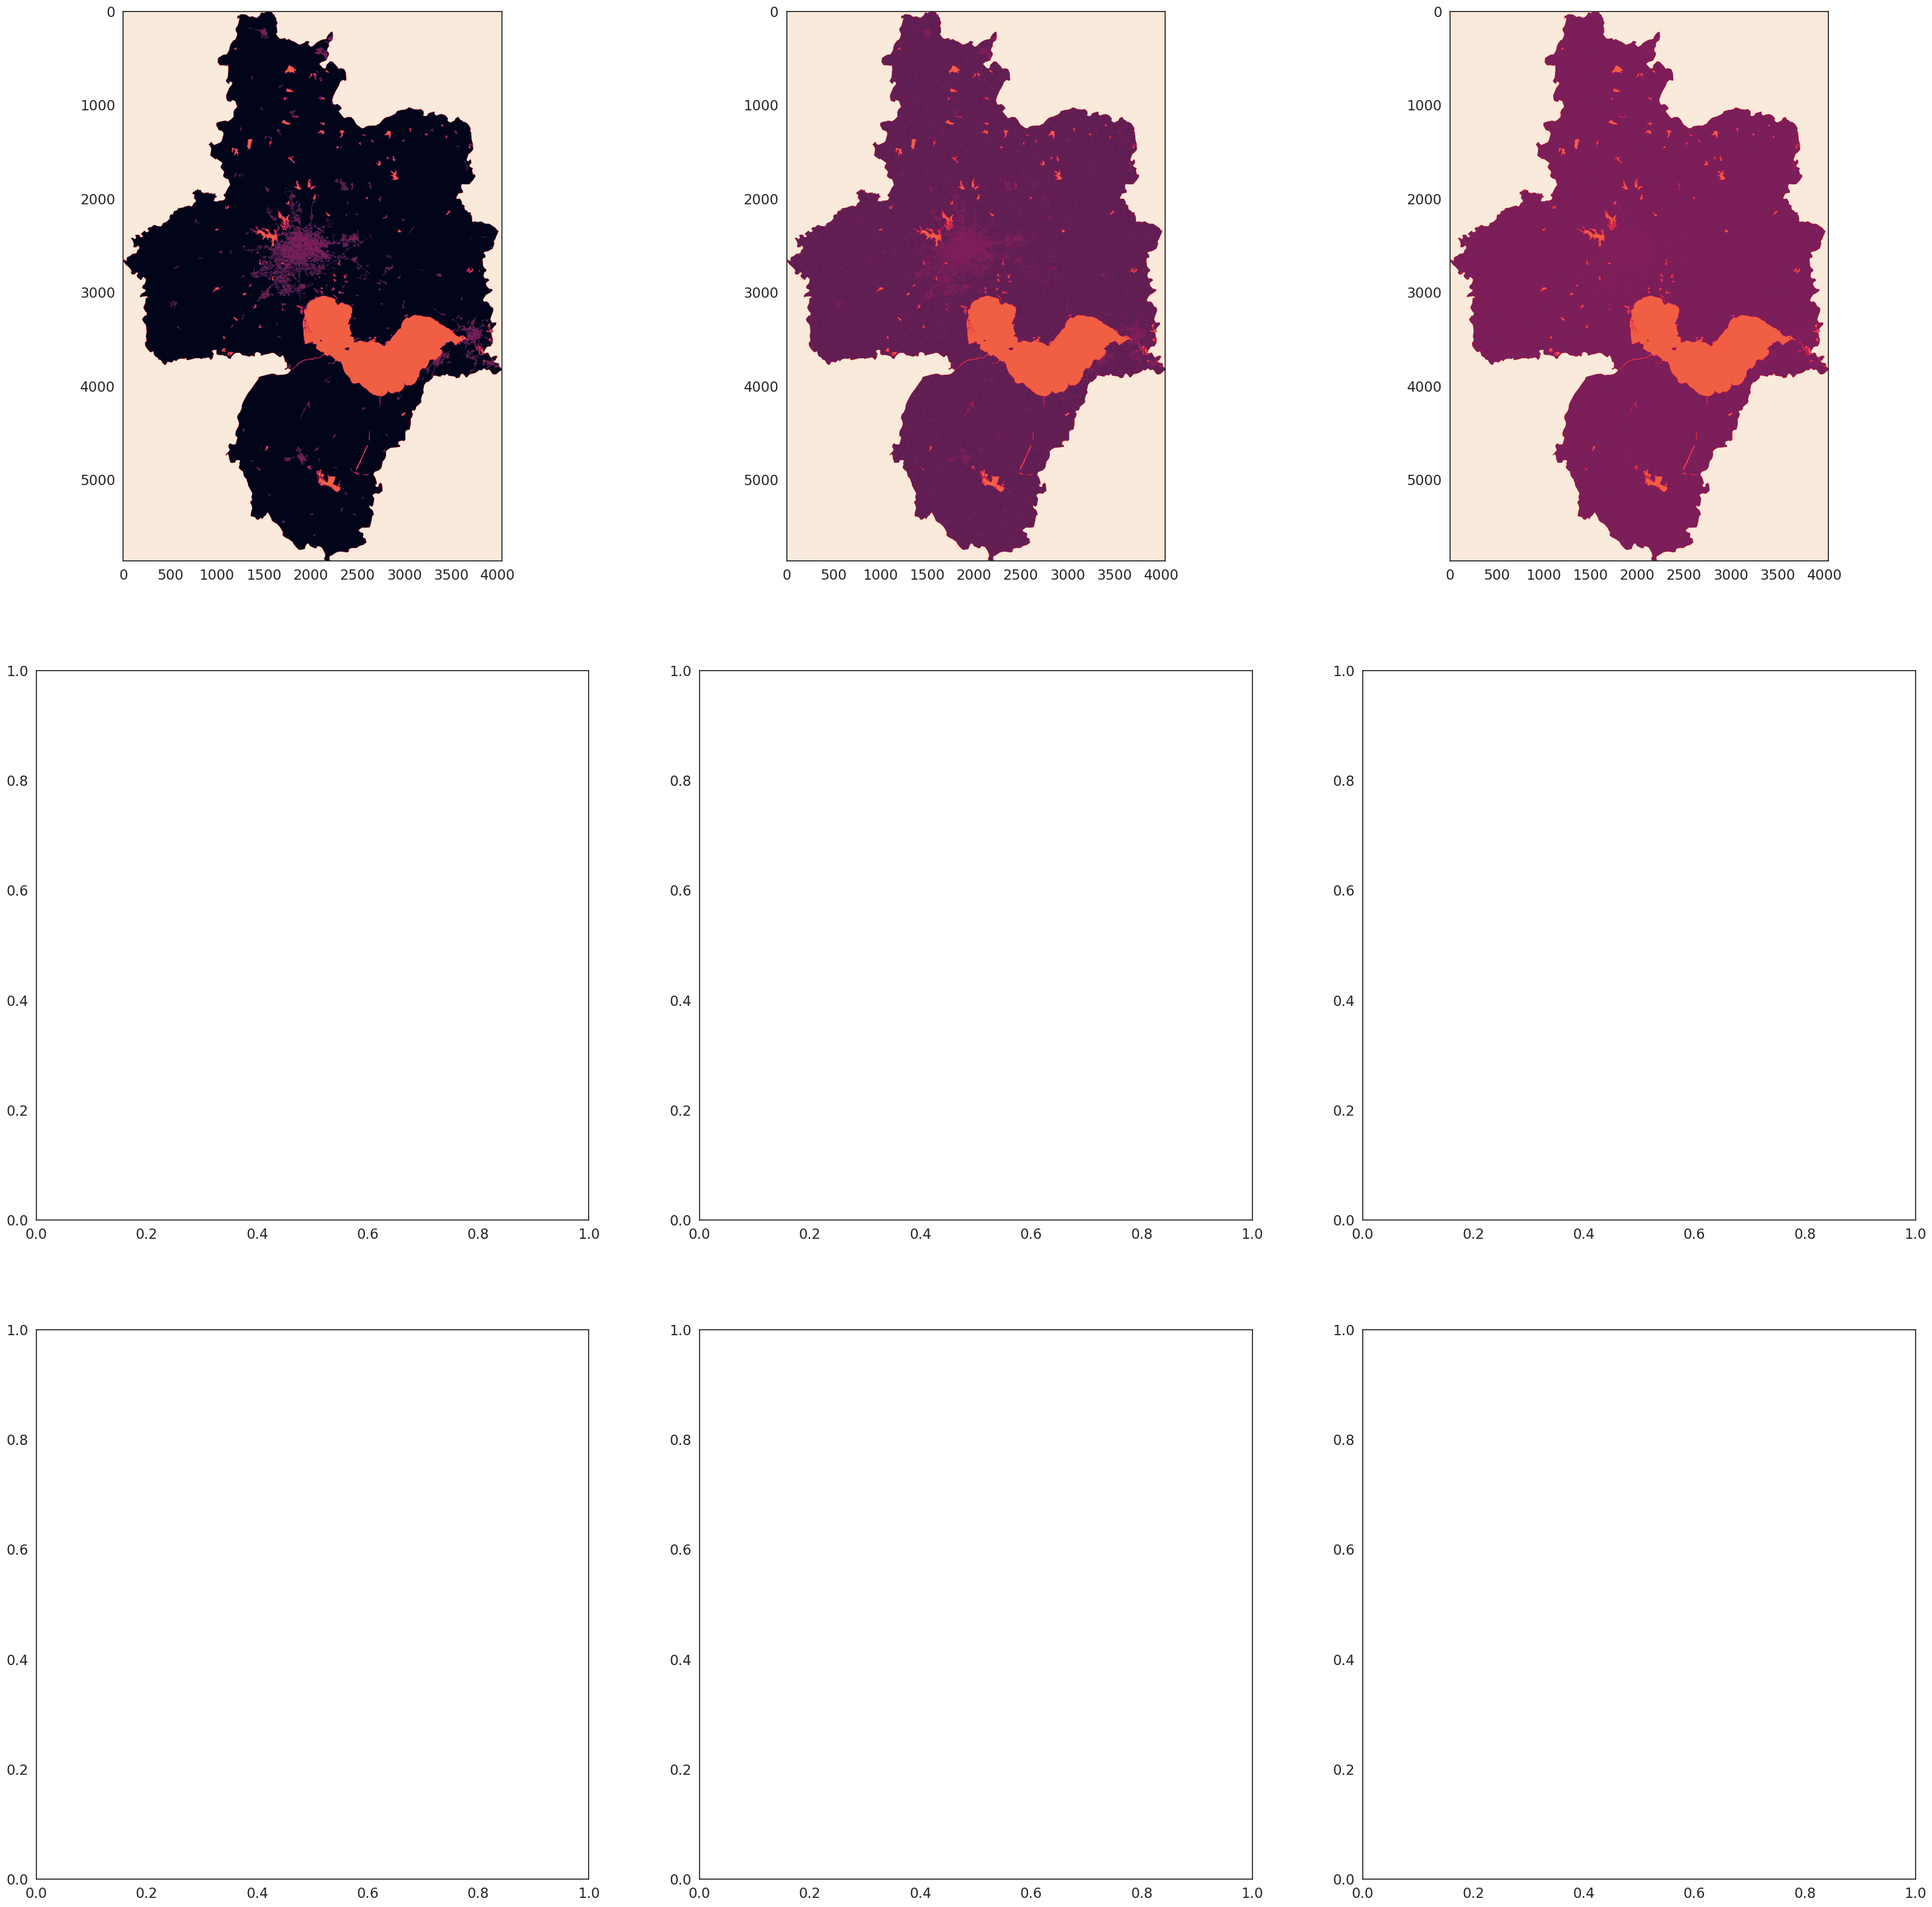

In [158]:
history = np.array([]).reshape((0, n, m))
now = all_data["Landuse2008"]


n_graph, m_graph = 3, 3
im, ax = plt.subplots(n_graph, m_graph, figsize=(40, 40))

for i in range(3):
    ax[i // m_graph][i % m_graph].imshow(now)
    for j in range(5):
        now = next_step(now)
    history = np.concatenate((history, now.reshape((1, n, m))), axis = 0)

history = np.concatenate((history, now.reshape((1, n, m))), axis = 0)

0.0

False